In [19]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import electric_rates as erates
%matplotlib inline

In [18]:
class vehicle_ice:
    def __init__(self, name, mpg_hwy, mpg_city, average_override=None):
        self.mpg_hwy = mpg_hwy
        self.mpg_city = mpg_city
        self.name = name
        if average_override != None:
            self.mpg_hwy = average_override
            self.mpg_city = average_override
        
    def get_ave_mpg(self, fract_hwy=.50):
        return fract_hwy*self.mpg_hwy + (1-fract_hwy)*self.mpg_city
    
    
class vehicle_ev:
    def __init__(self, name, kwh_per_mile):
        self.kwh_per_mile = kwh_per_mile
        
    
class vehicle_usage:
    def __init__(self, miles_per_month, fract_hwy):
        self.miles_per_month = miles_per_month
        self.fract_hwy = fract_hwy

        
def gas_costs_per_month( miles_per_month, gas_dollars_per_gal, miles_per_gallon ):
    ## TODO: generalize so any input parameter can be a vector, and all combos are explored
    ## pass in: 
    ##   miles_per_month, miles_per_gallon: real number
    ##   numpy arrays, 
    ## Return: generate an ndarray
    ##
    dollars_per_month = miles_per_month * gas_dollars_per_gal * (1.0/miles_per_gallon)
    return dollars_per_month

def electr_cost_per_month( miles_per_month, ave_dollars_per_kwh, kwh_per_mile ):
    dollars_per_month = miles_per_month * ave_dollars_per_kwh * kwh_per_mile
    return dollars_per_month

In [8]:
gas_costs = np.linspace(2.00, 5.00, 10)

erates = elect_rates()
erates.add_tier(datetime.time(0), datetime.time(5), 0.17)


miles_per_month = 15000.0/12.0

## Cars
volt = vehicle_ev("Volt 2016", 0.37)
grand_vitara = vehicle_ice("grand vitara", 19, 23, average_override=21)
mazda_3 = vehicle_ice("Mazda 3 2.5l", 28, 39 )
sienna = vehicle_ice("Sienna", 19,25)
gti = vehicle_ice( "GTI", 25,33 )

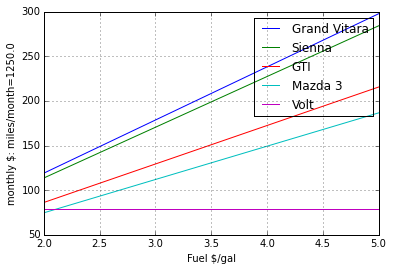

In [9]:
gv_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, grand_vitara.get_ave_mpg() )
mazda_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, mazda_3.get_ave_mpg() )
sienna_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, sienna.get_ave_mpg() )
gti_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, gti.get_ave_mpg() )
volt_costs_monthly = electr_cost_per_month( miles_per_month, erates.get_ave_rate(), volt.kwh_per_mile )
plt.plot(gas_costs, gv_costs_monthly, label="Grand Vitara")
plt.plot(gas_costs, sienna_costs_monthly, label="Sienna")
plt.plot(gas_costs, gti_costs_monthly, label="GTI")
plt.plot(gas_costs, mazda_costs_monthly, label="Mazda 3")
plt.plot(gas_costs, [volt_costs_monthly]*gas_costs.shape[0], label="Volt" )
plt.xlabel("Fuel $/gal")
plt.ylabel("monthly $: miles/month="+str(miles_per_month))
plt.legend()
plt.grid()
plt.show()

In [11]:
e_daily = pd.read_csv("electric-usage--raw.csv")

0       0.265
1       0.195
2       0.180
3       0.275
4       0.200
5       0.220
6       0.170
7       0.170
8       0.170
9       0.170
10      0.315
11      0.435
12      2.840
13      0.385
14      0.245
15      0.290
16      0.275
17      0.190
18      0.215
19      0.175
20      0.185
21      0.195
22      0.260
23      0.270
24      0.305
25      0.280
26      0.270
27      0.290
28      0.275
29      0.270
        ...  
9498    2.260
9499    0.290
9500    0.285
9501    0.250
9502    1.570
9503    1.420
9504    0.275
9505    0.260
9506    0.255
9507    0.275
9508    0.270
9509    0.260
9510    0.235
9511    0.495
9512    0.275
9513    0.320
9514    0.205
9515    0.195
9516    0.560
9517    1.105
9518    1.060
9519    1.320
9520    1.360
9521    1.220
9522    0.980
9523    0.455
9524    1.460
9525    0.655
9526    0.545
9527    0.255
Name: Value, dtype: float64